## Recognizing Styles of Brands and Products  
'Style' data set by Olga Belitskaya hosted at Kaggle.com on 8 March 2018; wget https://www.kaggle.com/olgabelitskaya/style-color-images/downloads/style-color-images.zip 

In [1]:
%reload_ext autoreload  
%autoreload 2 
%matplotlib inline  

In [2]:
from fastai.imports import *  

In [3]:
from fastai.conv_learner import *  
from fastai.plots import *  
from fastai.transforms import *  
from fastai.model import *  
from fastai.dataset import *  
from fastai.sgdr import *  
from planet import f2  

In [4]:
torch.cuda.is_available()  

True

In [5]:
torch.backends.cudnn.enabled  

True

### 1. Data Augmentation  

In [6]:
PATH = "data/style/"  
os.listdir(PATH)  

['models',
 'o1tmp1',
 'StyleColorImages.h5',
 'train894',
 'style.zip',
 'o1tmp2',
 'styletags.csv',
 'stylebp.csv',
 'o1tmp',
 'styleproduct.csv',
 'test0',
 '.ipynb_checkpoints',
 'styletag.csv',
 'stylebrand.csv',
 'o2tmp1ML',
 'style.csv']

In [7]:
PATH2 = "data/style/train894/"
os.listdir(f'{PATH2}')[:5]  

['2_1_006.png', '2_2_002.png', '2_0_011.png', '5_2_030.png', '2_5_003.png']

In [8]:
len(os.listdir(f'{PATH2}'))  

897

In [9]:
label_csv = f'{PATH}styletag.csv'  
n = len(list(open(label_csv)))-1  
val_idxs = get_cv_idxs(n)  
n  

894

In [10]:
len(val_idxs)  

178

In [11]:
label_df = pd.read_csv(label_csv)  
label_df.head()  

,file,tag
0,0_0_001.png,Christian Louboutin shoes
1,0_0_002.png,Christian Louboutin shoes
2,0_0_003.png,Christian Louboutin shoes
3,0_0_004.png,Christian Louboutin shoes
4,0_0_005.png,Christian Louboutin shoes


In [12]:
label_df.pivot_table(index='tag', aggfunc=len). sort_values('file', ascending=True) 

,file
tag,
Gucci nail polish,2
Gucci lipstick,2
Yves Saint Laurent bracelet,3
Dolce & Gabbana ring,3
Yves Saint Laurent ring,3
Yves Saint Laurent necklace,4
Dolce & Gabbana necklace,4
Dolce & Gabbana bracelet,4
Versace necklace,5


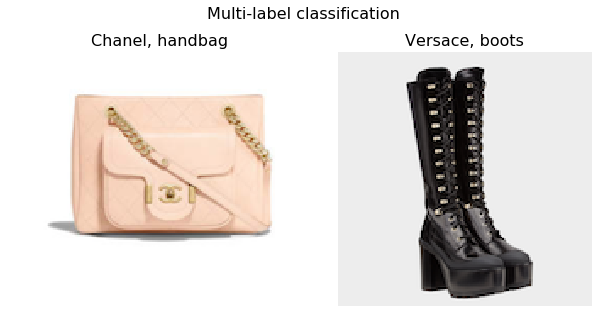

In [13]:
list_paths = [f"{PATH2}1_2_008.png", f"{PATH2}5_8_003.png"]  
titles=["Chanel, handbag", "Versace, boots"]  
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")  

In [14]:
bs=8  
sz=64  
m_zoom=1.07 
metrics=[f2]  
f_model = resnet50    

In [15]:
def get_data(sz): 
        tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=m_zoom)
        return ImageClassifierData.from_csv(PATH, 'train894', label_csv, tfms=tfms, val_idxs=val_idxs, bs=bs)

In [16]:
data = get_data(sz)  

In [17]:
sz_trn = len(data.trn_ds); sz_trn 

716

In [18]:
size_d = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}
row_sz,col_sz = list(zip(*size_d.values())) 
row_sz=np.array(row_sz); col_sz=np.array(col_sz) 
row_sz[:5], col_sz[:5]    

(array([150, 150, 150, 150, 150]), array([150, 150, 150, 150, 150]))

(array([  0.,   0.,   0.,   0.,   0., 715.,   0.,   0.,   0.,   0.]),
 array([149.5, 149.6, 149.7, 149.8, 149.9, 150. , 150.1, 150.2, 150.3, 150.4, 150.5]),
 <a list of 10 Patch objects>)

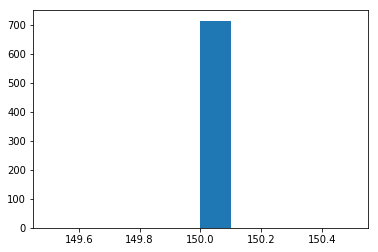

In [19]:
plt.hist(col_sz[row_sz])

In [20]:
len(data.classes), data.classes

(23,
 ['&',
  'Chanel',
  'Christian',
  'Dior',
  'Dolce',
  'Gabbana',
  'Gucci',
  'Laurent',
  'Louboutin',
  'Saint',
  'Versace',
  'Yves',
  'boots',
  'bracelet',
  'earrings',
  'handbag',
  'lipstick',
  'nail',
  'necklace',
  'polish',
  'ring',
  'shoes',
  'watches'])

In [21]:
x,y = next(iter(data.val_dl)) 
y  



Columns 0 to 12 
    0     0     1     0     0     0     0     0     1     0     0     0     0
    0     0     1     0     0     0     0     0     1     0     0     0     0
    0     0     1     0     0     0     0     0     1     0     0     0     0
    0     0     1     0     0     0     0     0     1     0     0     0     0
    0     0     1     0     0     0     0     0     1     0     0     0     0
    0     0     1     0     0     0     0     0     1     0     0     0     0
    0     0     1     0     0     0     0     0     1     0     0     0     0
    0     0     1     0     0     0     0     0     1     0     0     0     0

Columns 13 to 22 
    0     0     0     0     0     0     0     0     1     0
    0     0     0     0     0     0     0     0     1     0
    0     0     0     0     0     0     0     0     1     0
    0     0     0     0     0     0     0     0     1     0
    0     0     0     0     0     0     0     0     1     0
    0     0     0     0     0     0   

In [22]:
list(zip(data.classes, y[0])) 

[('&', 0.0),
 ('Chanel', 0.0),
 ('Christian', 1.0),
 ('Dior', 0.0),
 ('Dolce', 0.0),
 ('Gabbana', 0.0),
 ('Gucci', 0.0),
 ('Laurent', 0.0),
 ('Louboutin', 1.0),
 ('Saint', 0.0),
 ('Versace', 0.0),
 ('Yves', 0.0),
 ('boots', 0.0),
 ('bracelet', 0.0),
 ('earrings', 0.0),
 ('handbag', 0.0),
 ('lipstick', 0.0),
 ('nail', 0.0),
 ('necklace', 0.0),
 ('polish', 0.0),
 ('ring', 0.0),
 ('shoes', 1.0),
 ('watches', 0.0)]

### 2. Learning Rate Experiment 

In [23]:
y = data.trn_ds.denorm(x)[1] 
ims = np.stack([y for i in range(30)])  
ps = [0.2,0.4,0.6,0.3,0.5] 
learn = ConvLearner.pretrained(f_model, data, ps=ps, metrics=metrics)  

In [24]:
lrf=learn.lr_find()  

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                        
    0      0.832059   5.733437   0.31016   



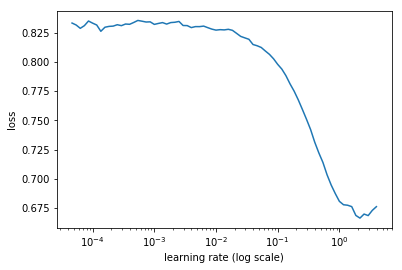

In [25]:
learn.sched.plot()  

In [26]:
lr = 0.3  

### 3. Drill in last layer 

In [27]:
%time learn.fit(lr, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   f2                        
    0      0.388654   0.313592   0.546105  
    1      0.304229   0.25827    0.622824                  
    2      0.266902   0.244166   0.645304                  
    3      0.243718   0.245586   0.629021                  
    4      0.230152   0.238532   0.638935                  

CPU times: user 50 s, sys: 15.1 s, total: 1min 5s
Wall time: 59.6 s


[0.23853153, 0.6389348079915981]

= Epoch   100% 5/5 00:59<00:00, 11.93s/it 

epoch      trn_loss   val_loss   f2                        
    0      0.388654   0.313592   0.546105  
    1      0.304229   0.25827    0.622824                  
    2      0.266902   0.244166   0.645304                  
    3      0.243718   0.245586   0.629021                  
    4      0.230152   0.238532   0.638935                  

CPU times: user 50 s, sys: 15.1 s, total: 1min 5s
Wall time: 59.6 s

 0.23853153, 0.6389348079915981 =. 

### 4. Unfreeze all layers 

In [28]:
learn.unfreeze() 
%time learn.fit(lr, 2) 

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   f2                        
    0      0.392281   0.381983   0.362648  
    1      0.365872   0.371991   0.335704                  

CPU times: user 25.7 s, sys: 7.98 s, total: 33.6 s
Wall time: 31.7 s


[0.3719905, 0.3357039811096091]

= Epoch   100% 2/2  00:31<00:00, 15.86s/it 

epoch      trn_loss   val_loss   f2                        
    0      0.392281   0.381983   0.362648  
    1      0.365872   0.371991   0.335704                  

CPU times: user 25.7 s, sys: 7.98 s, total: 33.6 s
Wall time: 31.7 s

 0.3719905, 0.3357039811096091 =. 

In [29]:
sz=80  
m_zoom = 1.1  
data = get_data(sz)  
y = data.trn_ds.denorm(x)[1] 
ims = np.stack([y for i in range(30)])  
learn = ConvLearner.pretrained(f_model, data, ps=ps, metrics=metrics)  

In [30]:
lrf=learn.lr_find()  

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                        
    0      0.825869   8.092792   0.362265  



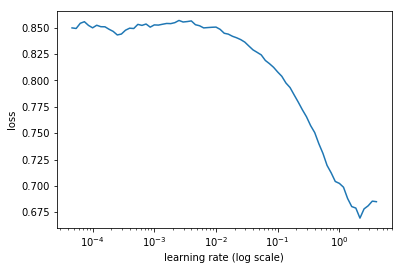

In [31]:
learn.sched.plot()  

In [32]:
lr = 0.1  

### 5. Train hard 

In [33]:
lrs = np.array([lr, lr/3, lr/10]) 
%time learn.fit(lr, 2, cycle_len=3, cycle_mult=2) 

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

epoch      trn_loss   val_loss   f2                        
    0      0.381868   0.263847   0.602329  
    1      0.271496   0.233548   0.676157                  
    2      0.234914   0.229466   0.68644                   
    3      0.235446   0.221066   0.697075                  
    4      0.219601   0.210835   0.735063                  
    5      0.195286   0.204302   0.730496                  
    6      0.17953    0.197933   0.731398                  
    7      0.173521   0.199966   0.746339                  
    8      0.167692   0.19599    0.732495                  

CPU times: user 1min 34s, sys: 29.7 s, total: 2min 4s
Wall time: 1min 53s


[0.19598956, 0.7324952607594498]

= Epoch   100% 9/9 01:53<00:00, 12.61s/it 

epoch      trn_loss   val_loss   f2                        
    0      0.381868   0.263847   0.602329  
    1      0.271496   0.233548   0.676157                  
    2      0.234914   0.229466   0.68644                   
    3      0.235446   0.221066   0.697075                  
    4      0.219601   0.210835   0.735063                  
    5      0.195286   0.204302   0.730496                  
    6      0.17953    0.197933   0.731398                  
    7      0.173521   0.199966   0.746339                  
    8      0.167692   0.19599    0.732495                  

CPU times: user 1min 34s, sys: 29.7 s, total: 2min 4s
Wall time: 1min 53s

0.19598956, 0.7324952607594498 =. 

In [34]:
learn.save('80_styleML')

In [35]:
learn.load('80_styleML')

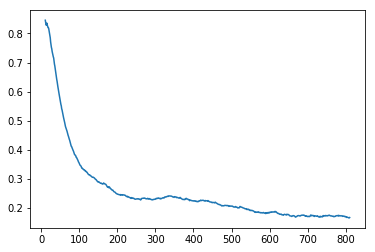

In [36]:
learn.sched.plot_loss()

Augment more data to improve accuracy. 

In [37]:
asz=96  
m_zoom = 1.1  
data = get_data(sz)  
y = data.trn_ds.denorm(x)[1] 
ims = np.stack([y for i in range(63)])  
learn = ConvLearner.pretrained(f_model, data, ps=ps, metrics=metrics, precompute=False) 

In [38]:
lrf=learn.lr_find()  

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                        
    0      0.761163   4.895176   0.428282  



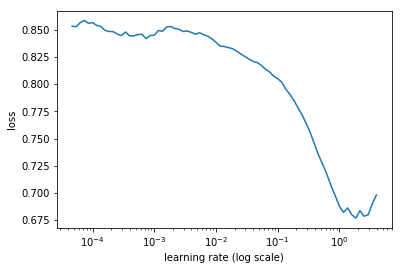

In [39]:
learn.sched.plot()  

In [40]:
%time learn.fit(lr, 2) 

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   f2                        
    0      0.34788    0.252652   0.653338  
    1      0.269417   0.224744   0.68706                   

CPU times: user 21 s, sys: 6.33 s, total: 27.3 s
Wall time: 25 s


[0.22474416, 0.6870598687176054]

= Epoch   100% 2/2 00:25<00:00, 12.52s/it 

epoch      trn_loss   val_loss   f2                        
    0      0.34788    0.252652   0.653338  
    1      0.269417   0.224744   0.68706                   

CPU times: user 21 s, sys: 6.33 s, total: 27.3 s
Wall time: 25 s

 0.22474416, 0.6870598687176054 =. 

Add parameters to prevent overfitting: 

In [41]:
def get_data(sz): 
        tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=m_zoom, pad=sz//8)
        return ImageClassifierData.from_csv(PATH, 'train894', label_csv, tfms=tfms, val_idxs=val_idxs, bs=bs)

In [42]:
data = get_data(sz)  
learn = ConvLearner.pretrained(f_model, data, ps=ps, metrics=metrics, precompute=False) 
learn.unfreeze()

In [43]:
lrs = np.array([lr, lr/3, lr/12]) 
%time learn.fit(lr, 3, cycle_len=2, cycle_mult=3) 

HBox(children=(IntProgress(value=0, description='Epoch', max=26), HTML(value='')))

epoch      trn_loss   val_loss   f2                        
    0      0.441264   0.432384   0.290448  
    1      0.379031   0.359161   0.369124                  
    2      0.382017   0.506155   0.251443                  
    3      0.371699   0.341397   0.399019                  
    4      0.362688   0.342013   0.465589                  
    5      0.340504   0.388765   0.514384                  
    6      0.340499   0.364021   0.501648                  
    7      0.332816   0.348796   0.513106                  
    8      0.354245   0.504712   0.283859                  
    9      0.364002   0.548182   0.356332                  
    10     0.361562   0.347099   0.452391                  
    11     0.356192   0.499086   0.497979                  
    12     0.343267   0.533871   0.463377                  
    13     0.337408   0.391195   0.479467                  
    14     0.336329   0.39248    0.461199                  
    15     0.330511   0.337385   0.578322               

[0.29026172, 0.6115430455532058]

= Epoch   100% 26/26 07:21<00:00, 16.96s/it  

epoch      trn_loss   val_loss   f2                        
    0      0.441264   0.432384   0.290448 c1  
    1      0.379031   0.359161   0.369124                  
    2      0.382017   0.506155   0.251443 c2                 
    3      0.371699   0.341397   0.399019                  
    4      0.362688   0.342013   0.465589                  
    5      0.340504   0.388765   0.514384                  
    6      0.340499   0.364021   0.501648                  
    7      0.332816   0.348796   0.513106                  
    8      0.354245   0.504712   0.283859 c3                 
    9      0.364002   0.548182   0.356332                  
    10     0.361562   0.347099   0.452391                  
    11     0.356192   0.499086   0.497979                  
    12     0.343267   0.533871   0.463377                  
    13     0.337408   0.391195   0.479467                  
    14     0.336329   0.39248    0.461199                  
    15     0.330511   0.337385   0.578322                  
    16     0.321086   0.447298   0.561543                  
    17     0.31415    0.820115   0.530022                  
    18     0.307911   0.452089   0.561945                  
    19     0.308674   0.28752    0.60691                   
    20     0.300845   0.34575    0.613987                  
    21     0.2934     0.276353   0.625345                  
    22     0.286526   0.309949   0.56155                   
    23     0.293258   0.307632   0.594552                  
    24     0.293171   0.294005   0.610648                  
    25     0.29452    0.290262   0.611543                  

CPU times: user 6min 2s, sys: 1min 50s, total: 7min 53s
Wall time: 7min 21s

0.29026172, 0.6115430455532058 =.

Stochastic Gradient Dropped down a hill.  
Give it a little push. 

In [45]:
%time learn.fit(0.0005, 4, cycle_len=1) 

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   f2                        
    0      0.289498   0.284811   0.632251  
    1      0.284089   0.278236   0.643044                  
    2      0.289151   0.293508   0.629119                  
    3      0.294157   0.279208   0.632152                  

CPU times: user 55.9 s, sys: 16.7 s, total: 1min 12s
Wall time: 1min 7s


[0.27920827, 0.6321520564077268]

=  Epoch   100% 4/4 01:07<00:00, 16.95s/it 

epoch      trn_loss   val_loss   f2                        
    0      0.289498   0.284811   0.632251  
    1      0.284089   0.278236   0.643044                  
    2      0.289151   0.293508   0.629119                  
    3      0.294157   0.279208   0.632152                  

CPU times: user 55.9 s, sys: 16.7 s, total: 1min 12s
Wall time: 1min 7s

 0.27920827, 0.6321520564077268 =.

In [46]:
learn.save('96_styleML') 

### 6. Differential Learning Rate  

In [47]:
learn.freeze()
asz=112  
ps = [0.2,0.3,0.5,0.3,0.5] 
m_zoom = 1.1  
data = get_data(sz)  
y = data.trn_ds.denorm(x)[1] 
ims = np.stack([y for i in range(63)])  
learn = ConvLearner.pretrained(f_model, data, ps=ps, metrics=metrics, precompute=True) 

100%|██████████| 23/23 [00:02<00:00,  9.20it/s]


In [48]:
lrf=learn.lr_find()  

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                         
    0      0.813539   4.721849   0.402136  



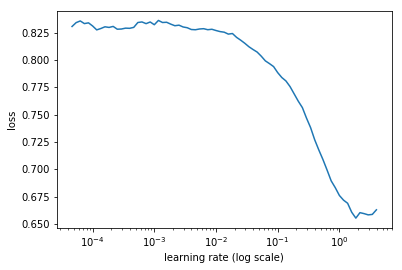

In [49]:
learn.sched.plot()  

In [50]:
%time learn.fit(lr, 2)  

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   f2                         
    0      0.350942   0.246306   0.691015  
    1      0.253652   0.230819   0.708273                   

CPU times: user 1.45 s, sys: 379 ms, total: 1.83 s
Wall time: 1.66 s


[0.23081931, 0.7082729061197237]

= Epoch   100% 2/2 00:01<00:00, 1.21it/s 

epoch      trn_loss   val_loss   f2                         
    0      0.350942   0.246306   0.691015  
    1      0.253652   0.230819   0.708273                   

CPU times: user 1.45 s, sys: 379 ms, total: 1.83 s
Wall time: 1.66 s

0.23081931, 0.7082729061197237 =. 

In [51]:
learn.set_data(get_data(sz))
learn.unfreeze() 
lrs = np.array([lr, lr/3, lr/12]) 
%time learn.fit(lrs, 3, cycle_len=2, cycle_mult=2) 

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

epoch      trn_loss   val_loss   f2                        
    0      0.225463   0.222396   0.718472  
    1      0.224617   0.221637   0.721281                  
    2      0.224692   0.215678   0.733381                  
    3      0.219516   0.211477   0.738221                  
    4      0.220476   0.212385   0.735528                  
    5      0.212594   0.214285   0.740043                  
    6      0.220533   0.212528   0.732298                  
    7      0.210399   0.209033   0.738852                  
    8      0.210692   0.212456   0.741402                  
    9      0.205472   0.20734    0.748871                  
    10     0.201884   0.209383   0.745966                  
    11     0.199541   0.205703   0.741771                  
    12     0.205888   0.208049   0.747636                  
    13     0.201052   0.20792    0.73943                   

CPU times: user 2min 30s, sys: 45 s, total: 3min 15s
Wall time: 2min 57s


[0.20792024, 0.7394301447749726]

= Epoch   100% 14/14 02:57<00:00, 12.65s/it 

epoch      trn_loss   val_loss   f2                        
    0      0.225463   0.222396   0.718472 c1  
    1      0.224617   0.221637   0.721281                  
    2      0.224692   0.215678   0.733381 c2                  
    3      0.219516   0.211477   0.738221                  
    4      0.220476   0.212385   0.735528                  
    5      0.212594   0.214285   0.740043                  
    6      0.220533   0.212528   0.732298 c3                  
    7      0.210399   0.209033   0.738852                  
    8      0.210692   0.212456   0.741402                  
    9      0.205472   0.20734    0.748871                  
    10     0.201884   0.209383   0.745966                  
    11     0.199541   0.205703   0.741771                  
    12     0.205888   0.208049   0.747636                  
    13     0.201052   0.20792    0.73943                   

CPU times: user 2min 30s, sys: 45 s, total: 3min 15s
Wall time: 2min 57s

0.20792024, 0.7394301447749726 =. 

In [52]:
learn.save('112_styleML') 

Is this thing working? 

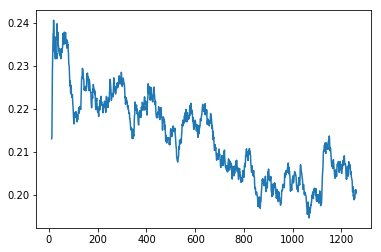

In [53]:
learn.sched.plot_loss() 

Are we there yet? 

### Began with 31% accuracy... 

In [54]:
sz=128 
learn.freeze() 
m_zoom = 1.11  
data = get_data(sz)  
y = data.trn_ds.denorm(x)[1] 
ims = np.stack([y for i in range(23)])  
learn = ConvLearner.pretrained(f_model, data, ps=ps, metrics=metrics, precompute=True) 

100%|██████████| 23/23 [00:02<00:00,  8.41it/s]


In [55]:
%time learn.fit(lr, 3) 

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   f2                         
    0      0.337843   0.2376     0.643749  
    1      0.238445   0.211754   0.700542                   
    2      0.20387    0.194314   0.731251                   

CPU times: user 2.23 s, sys: 490 ms, total: 2.72 s
Wall time: 2.56 s


[0.19431409, 0.7312514128572086]

In [56]:
learn.unfreeze()  
learn.set_data(get_data(sz)) 
%time learn.fit(0.08, 3, cycle_len=1, cycle_mult=2) 

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                        
    0      0.200004   0.19194    0.734624  
    1      0.188383   0.182253   0.765025                  
    2      0.176715   0.179774   0.753215                  
    3      0.18681    0.166874   0.785796                  
    4      0.166785   0.174156   0.778998                  
    5      0.159903   0.178841   0.776415                  
    6      0.151719   0.180132   0.776107                  

CPU times: user 1min 25s, sys: 24.4 s, total: 1min 49s
Wall time: 1min 37s


[0.18013158, 0.776106703717424]

= Epoch   100% 7/7 01:37<00:00, 13.91s/it 

epoch      trn_loss   val_loss   f2                        
    0      0.200004   0.19194    0.734624 c1  
    1      0.188383   0.182253   0.765025 c2                  
    2      0.176715   0.179774   0.753215                  
    3      0.18681    0.166874   0.785796 c3                  
    4      0.166785   0.174156   0.778998                  
    5      0.159903   0.178841   0.776415                  
    6      0.151719   0.180132   0.776107                  

CPU times: user 1min 25s, sys: 24.4 s, total: 1min 49s
Wall time: 1min 37s

 0.18013158, 0.776106703717424 =. 

In [57]:
learn.save('128_styleML') 

### 7. Test Time Augmentation  

In [58]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0) 

In [59]:
f2(preds,y)

0.7715135715503334

### 8. Review 
This dataset has 894 images from 23 classes of brands and products.  
In this 64 categories, there are 24 categories with less than  
10 images, 4 with 3 images or less. 

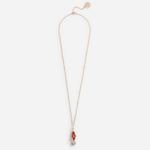

In [65]:
files = os.listdir(f'{PATH2}')
fn = f'{PATH2}{files[301]}' 
Image.open(fn)

Some of the products share similar attributes such as   
necklace, ear-rings, rings and bracelets. 

This Fast.AI using ResNet50 started identifing styles of  
brands and products from 31% leading up to 77% accuracy. 

Cloud computer and GPU sponsored by Google Cloud.  
Fast.AI by Jeremy Howard and Rachel Thomas, the Data Institute, USFCA.  
Yap Jia Qing, James Lee, Desmon, Yen Ping, Han Chong, Rou En, Hafid at Nurture.Ai.  
Venue sponsorship by Mindvalley and NEXT Academy.  
And my friends Choy Hon Yoong and Muhammad Danial bin Rusdi.

This artificial intelligence was trained by Khoo on 16 March 2018.  

### Thank you  

#### Appendix  

In [61]:
learn 

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      )
    )
    (1): Bot

#### Appendix 2

In [ ]:
sz=128 
data = get_data(sz)  
x,_ = next(iter(data.aug_dl)) 
y = data.trn_ds.denorm(x)[1] 
ims = np.stack([y for i in range(6)]) 
learn = ConvLearner.pretrained(f_model, data, metrics=metrics) 
lr = 0.2 
learn.fit(lrs, 2, cycle_len=3, cycle_mult=2)  

= Epoch   100% 9/9 02:05<00:00, 13.92s/it  

epoch      trn_loss   val_loss   f2                        
    0      0.834306   0.737467   0.428988  c1  
    1      0.837492   0.747909   0.428038                  
    2      0.834613   0.731034   0.42929                   
    3      0.834362   0.733282   0.42973   c2                 
    4      0.830868   0.731053   0.427738                  
    5      0.838683   0.737035   0.430071                  
    6      0.826025   0.73112    0.429187                  
    7      0.826086   0.739157   0.428044                  
    8      0.832988   0.738455   0.430476                  

 0.7384554, 0.43047622701031196 =. 

Floating on __Learning rate 0.2 __

__End__